obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS

alpha = Right Ascension angle (at J2000 epoch)

delta = Declination angle (at J2000 epoch)

u = Ultraviolet filter in the photometric system

g = Green filter in the photometric system

r = Red filter in the photometric system

i = Near Infrared filter in the photometric system

z = Infrared filter in the photometric system

run_ID = Run Number used to identify the specific scan

rereun_ID = Rerun Number to specify how the image was processed

cam_col = Camera column to identify the scanline within the run

field_ID = Field number to identify each field

spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the 
same spec_obj_ID must share the output class)

class = object class (galaxy, star or quasar object)

redshift = redshift value based on the increase in wavelength

plate = plate ID, identifies each plate in SDSS

MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken

fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

#### Notes
- Large outliers in the colour shifts present in stars


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
obj_df = pd.read_csv("star_classification.csv")
model_df = obj_df.copy()

In [3]:
drop_ids = ["run_ID", "rerun_ID", "field_ID", "fiber_ID"]
obj_df = obj_df.drop(drop_ids, axis=1)

In [4]:
obj_df.head()

,obj_ID,alpha,delta,u,g,r,i,z,cam_col,spec_obj_ID,class,redshift,plate,MJD
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,2,6.543777e+18,GALAXY,0.634794,5812,56354
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,5,1.176014e+19,GALAXY,0.779136,10445,58158
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,2,5.152200e+18,GALAXY,0.644195,4576,55592
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,3,1.030107e+19,GALAXY,0.932346,9149,58039
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,3,6.891865e+18,GALAXY,0.116123,6121,56187


In [5]:
obj_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   cam_col      100000 non-null  int64  
 9   spec_obj_ID  100000 non-null  float64
 10  class        100000 non-null  object 
 11  redshift     100000 non-null  float64
 12  plate        100000 non-null  int64  
 13  MJD          100000 non-null  int64  
dtypes: float64(10), int64(3), object(1)
memory usage: 10.7+ MB


In [6]:
obj_df["class"].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

<Axes: >

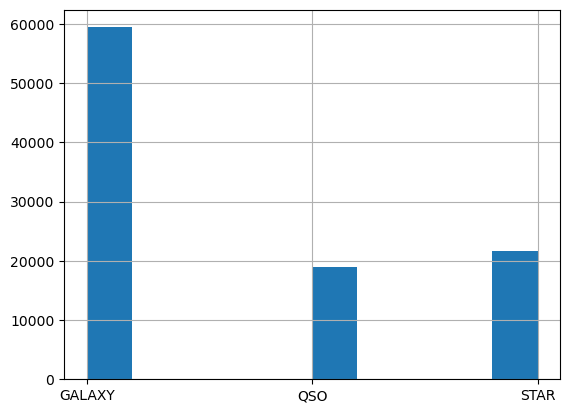

In [7]:
class_labels = obj_df["class"]
class_labels.hist()

In [8]:
galaxies = obj_df[obj_df["class"] == "GALAXY"]
quesars = obj_df[obj_df["class"] == "QSO"]
stars = obj_df[obj_df["class"] == "STAR"]

In [10]:
galaxies["redshift"].describe()

count    59445.000000
mean         0.421596
std          0.264858
min         -0.009971
25%          0.164527
50%          0.456274
75%          0.594699
max          1.995524
Name: redshift, dtype: float64

In [11]:
quesars["redshift"].describe()

count    18961.000000
mean         1.719676
std          0.913954
min          0.000461
25%          1.106605
50%          1.617232
75%          2.220279
max          7.011245
Name: redshift, dtype: float64

In [12]:
stars["redshift"].describe()

count    21594.000000
mean        -0.000115
std          0.000465
min         -0.004136
25%         -0.000295
50%         -0.000076
75%          0.000075
max          0.004153
Name: redshift, dtype: float64

In [13]:
obj_df["redshift"].describe()

count    100000.000000
mean          0.576661
std           0.730707
min          -0.009971
25%           0.054517
50%           0.424173
75%           0.704154
max           7.011245
Name: redshift, dtype: float64

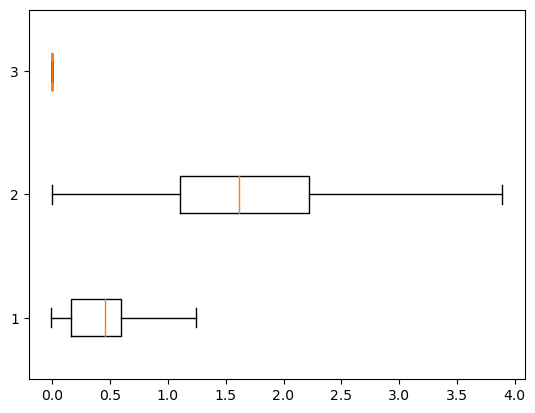

In [14]:
g = galaxies["redshift"]
q = quesars["redshift"]
s = stars["redshift"]

plt.boxplot([g, q, s], vert=False, showfliers=False)
plt.show()

In [15]:
stars.describe()

,obj_ID,alpha,delta,u,g,r,i,z,cam_col,spec_obj_ID,redshift,plate,MJD
count,2.159400e+04,21594.000000,21594.000000,21594.000000,21594.000000,21594.000000,21594.000000,21594.000000,21594.000000,2.159400e+04,21594.000000,21594.000000,21594.000000
mean,1.237664e+18,174.234485,23.498554,20.689805,19.153188,18.946969,18.543736,17.870400,3.576271,4.827882e+18,-0.000115,4287.920348,55131.149115
std,8.300272e+12,99.876175,20.383288,68.228825,68.210460,1.972786,1.841714,68.193708,1.628102,3.030706e+18,0.000465,2691.789973,1656.266867
min,1.237646e+18,0.029838,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,1.000000,3.006288e+17,-0.004136,267.000000,51608.000000
25%,1.237658e+18,114.863064,3.127855,19.327275,18.034847,17.454012,17.139703,16.963810,2.000000,2.609860e+18,-0.000295,2318.000000,53905.000000
50%,1.237663e+18,174.151671,23.400565,21.010555,19.542825,18.955080,18.592360,18.319225,4.000000,3.711076e+18,-0.000076,3296.000000,54924.000000
75%,1.237669e+18,240.850550,39.939705,22.960617,21.228690,20.557477,20.041690,19.729615,5.000000,7.190131e+18,0.000075,6386.000000,56365.000000
max,1.237681e+18,359.999810,83.000519,30.660390,30.607000,29.374110,30.250090,26.427790,6.000000,1.412693e+19,0.004153,12547.000000,58932.000000


In [16]:
quesars.describe()

,obj_ID,alpha,delta,u,g,r,i,z,cam_col,spec_obj_ID,redshift,plate,MJD
count,1.896100e+04,18961.000000,18961.000000,18961.000000,18961.000000,18961.000000,18961.000000,18961.000000,18961.000000,1.896100e+04,18961.000000,18961.000000,18961.000000
mean,1.237665e+18,180.474314,26.808621,21.547619,20.926193,20.624089,20.431173,20.266732,3.522494,7.817338e+18,1.719676,6943.071621,56627.547176
std,8.659960e+12,98.962348,19.588410,1.495879,1.163239,1.084237,1.080135,1.095076,1.575871,3.143628e+18,0.913954,2792.093167,1579.823334
min,1.237646e+18,0.010959,-15.980904,10.996230,13.662170,12.357630,12.637440,11.302470,1.000000,3.006293e+17,0.000461,267.000000,51608.000000
25%,1.237659e+18,129.133119,7.427090,20.637640,20.249730,20.006330,19.811070,19.644250,2.000000,5.635235e+18,1.106605,5005.000000,55868.000000
50%,1.237662e+18,183.682504,29.299167,21.503240,21.056290,20.772720,20.582110,20.373970,3.000000,8.527725e+18,1.617232,7574.000000,56955.000000
75%,1.237671e+18,235.864774,42.886953,22.286470,21.687770,21.413450,21.202280,21.001230,5.000000,9.847373e+18,2.220279,8746.000000,57870.000000
max,1.237681e+18,359.999615,82.288657,32.781390,27.894820,27.397090,32.141470,28.790550,6.000000,1.412694e+19,7.011245,12547.000000,58932.000000


# Model Testing

In [35]:
from sklearn.model_selection import train_test_split

X = model_df["redshift"]
y = model_df["class"]


x_train, y_train, x_test, y_test = train_test_split(X, y, test_size=0.3)

In [38]:
x_train.head()

67100    1.727614e-04
87908    3.496699e-01
68081    5.101381e-02
598      3.648643e-01
15458    2.295609e-07
Name: redshift, dtype: float64

In [39]:
y_test.head()

75534    GALAXY
30199    GALAXY
29622    GALAXY
68753    GALAXY
37362    GALAXY
Name: class, dtype: object

In [40]:
x_test

67100      STAR
87908       QSO
68081    GALAXY
598      GALAXY
15458      STAR
          ...  
71387       QSO
60832       QSO
63863    GALAXY
47358      STAR
18484      STAR
Name: class, Length: 70000, dtype: object

In [41]:
y_test

75534    GALAXY
30199    GALAXY
29622    GALAXY
68753    GALAXY
37362    GALAXY
          ...  
19627       QSO
44473    GALAXY
9905     GALAXY
84289      STAR
98212    GALAXY
Name: class, Length: 30000, dtype: object